# Analyzing Crime In Los Angeles

### Background
Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs!

However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. This is the juncture where the project objective assumes significance.

### Objective
Support the Los Angeles Police Department (LAPD) by cleaning and analyzing the crime data to identify patterns in criminal behavior. The LAPD plans to use our insights to allocate resources effectively to tackle various crimes in different areas.

### TO DO
- Clean and prepare the dataset for analysis
- Perform exploratory data analysis
- Formulate and address questions related to crime trends, patterns, and factors influencing crime rates.

<hr>
<hr>

In [1]:
# Importing Necessary Libraries

# Libraries for Mathematical Operations
import math
from scipy import stats

# Libraries for working with the Dataset
import numpy as np
import pandas as pd

# Libraries for Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# Libraries for ML
from sklearn.cluster import KMeans

<hr>

### Data Collection & Inspection

In [2]:
print("Loading Dataset.....")

df = pd.read_csv("crimes.csv")
df.head()

Loading Dataset.....


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [3]:
print("Number of records (rows) in dataset : {}".format(df.shape[0]))
print("Number of attributes (columns) in dataset : {}".format(df.shape[1]))

Number of records (rows) in dataset : 820599
Number of attributes (columns) in dataset : 28


In [4]:
print("Information On Dataset")
df.info()

Information On Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820599 entries, 0 to 820598
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           820599 non-null  int64  
 1   Date Rptd       820599 non-null  object 
 2   DATE OCC        820599 non-null  object 
 3   TIME OCC        820599 non-null  int64  
 4   AREA            820599 non-null  int64  
 5   AREA NAME       820599 non-null  object 
 6   Rpt Dist No     820599 non-null  int64  
 7   Part 1-2        820599 non-null  int64  
 8   Crm Cd          820599 non-null  int64  
 9   Crm Cd Desc     820599 non-null  object 
 10  Mocodes         707114 non-null  object 
 11  Vict Age        820599 non-null  int64  
 12  Vict Sex        712653 non-null  object 
 13  Vict Descent    712645 non-null  object 
 14  Premis Cd       820589 non-null  float64
 15  Premis Desc     820116 non-null  object 
 16  Weapon Used Cd  286078 non-null  

#### Discriptive Statistics Of Dataset

In [5]:
# Numerical Statistics
df.describe(include=[np.number]).round(3)

# similar to 
# df.describe().round(3)

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,8.205990e+05,820599.000,820599.000,820599.000,820599.000,820599.000,820599.000,820589.000,286078.000,820589.000,60413.000,2025.000,60.000,820599.000,820599.000
mean,2.161299e+08,1335.627,10.712,1117.592,1.414,500.804,29.806,305.759,362.917,500.542,957.478,983.615,990.750,33.605,-116.726
std,1.083045e+07,654.021,6.094,609.361,0.493,207.808,21.777,216.670,123.754,207.596,111.524,52.845,27.908,3.970,13.786
min,8.170000e+02,1.000,1.000,101.000,1.000,110.000,-3.000,101.000,101.000,110.000,210.000,310.000,821.000,0.000,-118.668
25%,2.102046e+08,900.000,6.000,621.000,1.000,331.000,7.000,101.000,310.000,331.000,998.000,998.000,998.000,34.010,-118.429
50%,2.201176e+08,1415.000,11.000,1142.000,1.000,442.000,31.000,203.000,400.000,442.000,998.000,998.000,998.000,34.058,-118.319
75%,2.220056e+08,1900.000,16.000,1617.000,2.000,626.000,45.000,501.000,400.000,626.000,998.000,998.000,998.000,34.162,-118.273
max,2.399165e+08,2359.000,21.000,2199.000,2.000,956.000,120.000,976.000,516.000,956.000,999.000,999.000,999.000,34.334,0.000


In [6]:
# Categorical Statistics
df.describe(include=[object])

# here, similar to
# df.describe(include=['O'])

,Date Rptd,DATE OCC,AREA NAME,Crm Cd Desc,Mocodes,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status,Status Desc,LOCATION,Cross Street
count,820599,820599,820599,820599,707114,712653,712645,820116,286078,820599,820599,820599,131214
unique,1385,1385,21,138,273856,5,20,306,79,6,6,63719,9688
top,02/03/2023 12:00:00 AM,12/02/2022 12:00:00 AM,Central,VEHICLE - STOLEN,0344,M,H,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,800 N ALAMEDA ST,BROADWAY
freq,924,1130,55209,87888,33541,338824,251794,207601,153313,656897,656897,1486,2184


In [7]:
print("Column Names")
df.columns

Column Names


Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

<hr>
<hr>

### Data Cleaning

#### Formating Date & Time

In [8]:
# Convert data types if needed (e.g., dates to date format, numerical values to appropriate numeric types).
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'], format='%m/%d/%Y %H:%M:%S %p')
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], format='%m/%d/%Y %H:%M:%S %p')
df.iloc[:, [1,2]].head()

,Date Rptd,DATE OCC
0,2020-01-08 12:00:00,2020-01-08 12:00:00
1,2020-01-02 12:00:00,2020-01-01 12:00:00
2,2020-04-14 12:00:00,2020-02-13 12:00:00
3,2020-01-01 12:00:00,2020-01-01 12:00:00
4,2020-01-01 12:00:00,2020-01-01 12:00:00


In [9]:
df['TIME OCC'] = df['TIME OCC'].apply(lambda x : str(x).zfill(4))
df['TIME OCC'] = df['TIME OCC'].apply(lambda x : x[:2] + ':' + x[2:])
df['TIME OCC'].head()

0    22:30
1    03:30
2    12:00
3    17:30
4    04:15
Name: TIME OCC, dtype: object

In [10]:
# Viewing Dataframe after Data Type change
display(df.iloc[:, [1,2,3]].info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820599 entries, 0 to 820598
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date Rptd  820599 non-null  datetime64[ns]
 1   DATE OCC   820599 non-null  datetime64[ns]
 2   TIME OCC   820599 non-null  object        
dtypes: datetime64[ns](2), object(1)
memory usage: 18.8+ MB


None

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,2020-01-08 12:00:00,2020-01-08 12:00:00,22:30,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,2020-01-02 12:00:00,2020-01-01 12:00:00,03:30,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,2020-04-14 12:00:00,2020-02-13 12:00:00,12:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,2020-01-01 12:00:00,2020-01-01 12:00:00,17:30,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,2020-01-01 12:00:00,2020-01-01 12:00:00,04:15,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


#### Missing Values

In [11]:
# Identifying Missing Data

df.isna().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           113485
Vict Age               0
Vict Sex          107946
Vict Descent      107954
Premis Cd             10
Premis Desc          483
Weapon Used Cd    534521
Weapon Desc       534521
Status                 0
Status Desc            0
Crm Cd 1              10
Crm Cd 2          760186
Crm Cd 3          818574
Crm Cd 4          820539
LOCATION               0
Cross Street      689385
LAT                    0
LON                    0
dtype: int64

<Axes: >

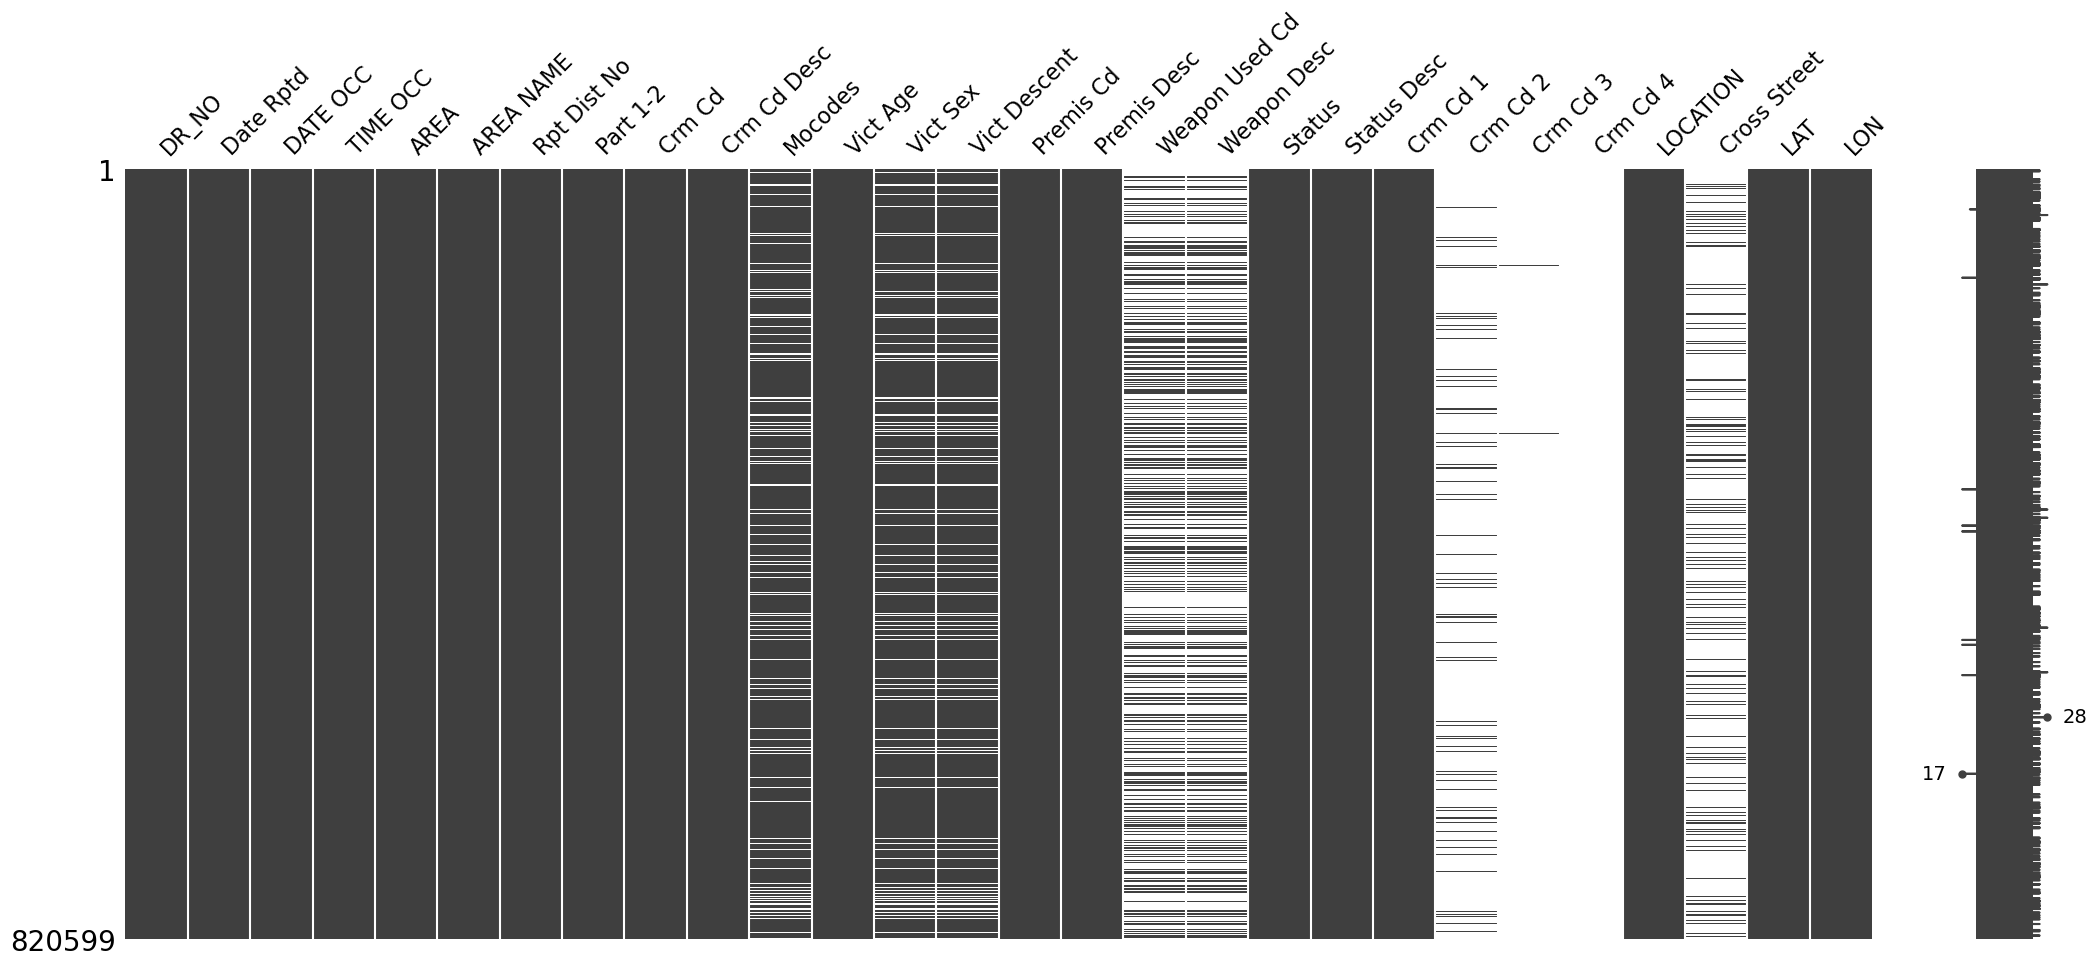

In [12]:
# Visualizing Missing Data Distribution
msno.matrix(df)

<Axes: >

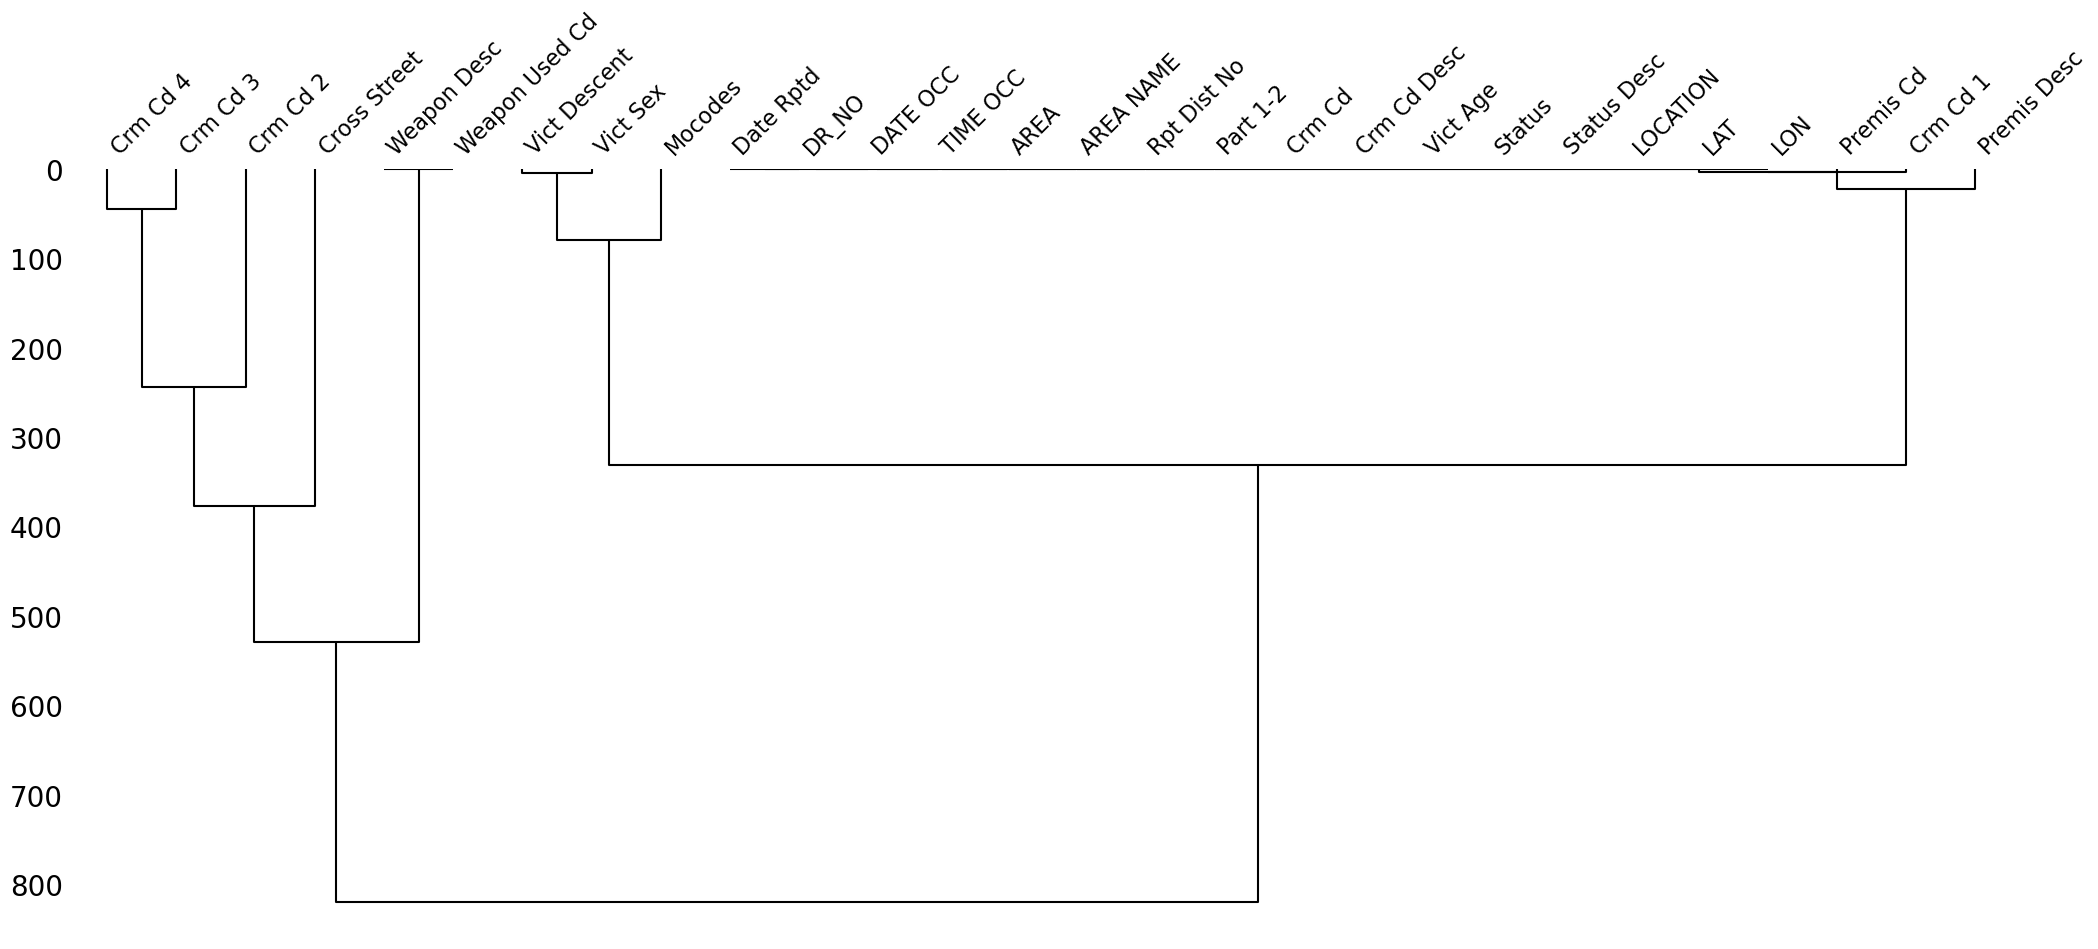

In [13]:
msno.dendrogram(df)

After visualizing the matrix graph and the dendrogram, we observe some sort of relationship between the missing values of the columns:
- Weapon Desc and Weapon Used Cd
- Vict Descent and Vict Sex

#### Duplicate Records

In [14]:
print("Number of duplicate rows : ", df.duplicated().sum())

Number of duplicate rows :  0


In [15]:
print("Number of duplicate values in DR_NO field : ", df['DR_NO'].duplicated().sum())

Number of duplicate values in DR_NO field :  0


- In df.duplicated().sum(), we calculated the number of duplicate records. No duplicate rows were found.
- In df['DR_NO].duplicated().sum(), we calculate the number of duplicate values in the "DR_NO" field, since it appears to be the primary key. No duplicate rows were found.

Thus we can safely assume that there are no duplicate records.

<hr>
<hr>

### Exploratory Data Analysis

#### Crime vs Time
Lets checkout the overall crime trend over the time period

In [16]:
count_crime_occ = pd.DataFrame(df['DATE OCC'].value_counts())
count_crime_rpt = pd.DataFrame(df['Date Rptd'].value_counts())
# We could have also used the below code to achieve similar result
# count_crime_occ = df.groupby(['DATE OCC'])['DR_NO'].size().reset_index(name='Count')

count_crime_occ.sort_index(inplace=True)
count_crime_rpt.sort_index(inplace=True)

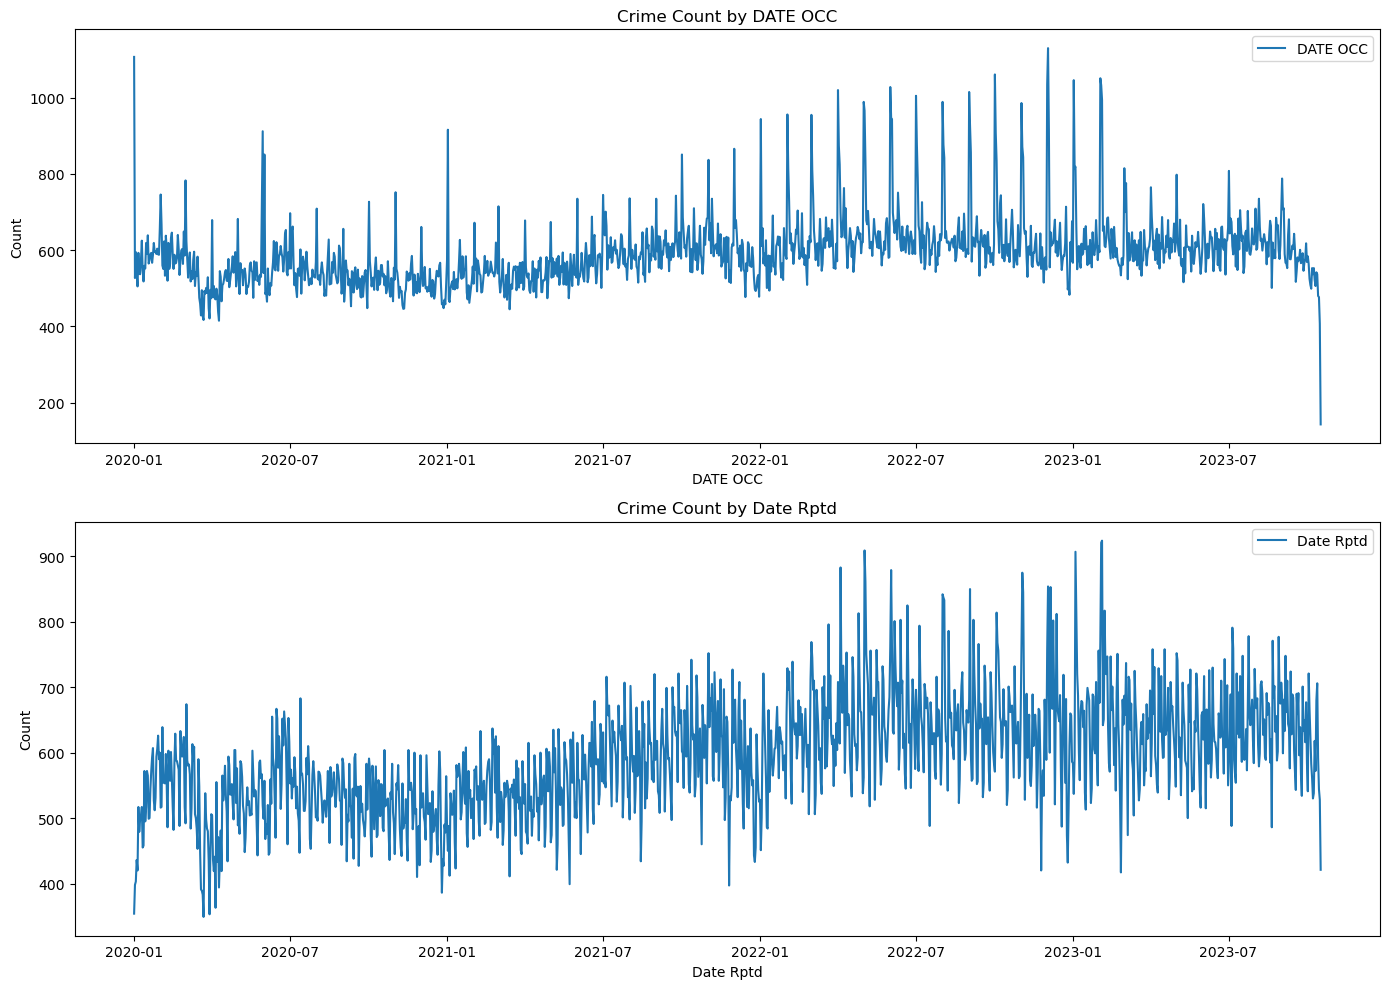

In [17]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

sns.lineplot(count_crime_occ, ax=ax1)
ax1.set_title("Crime Count by DATE OCC")
ax1.set_xlabel("DATE OCC")
ax1.set_ylabel("Count")

sns.lineplot(count_crime_rpt, ax=ax2)
ax2.set_title("Crime Count by Date Rptd")
ax2.set_xlabel("Date Rptd")
ax2.set_ylabel("Count")

plt.tight_layout()
plt.show()

From the above graphs, there appears to be a difference in the the number of crimes that occur vs number of crimes being reported everyday. Let's combine them to get a better understarding.

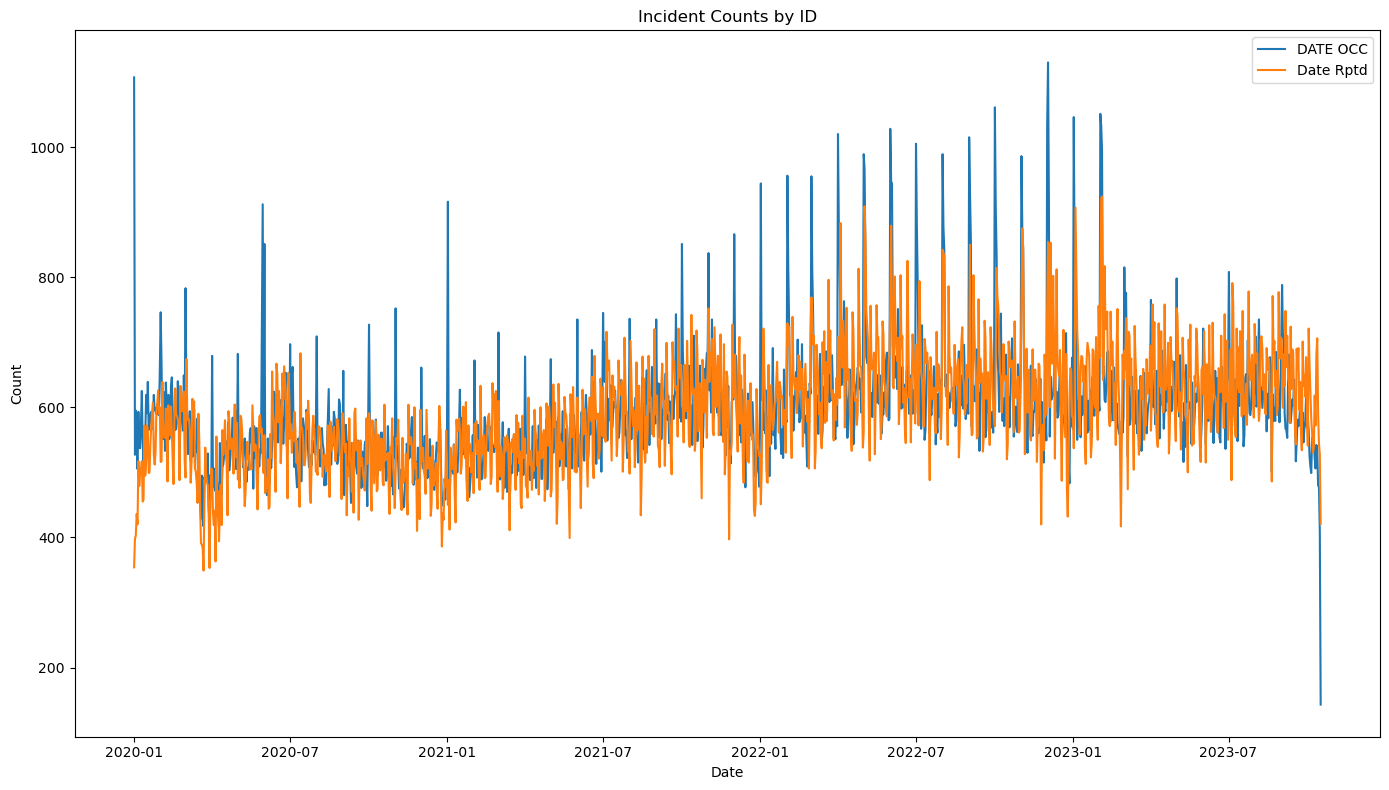

In [18]:
plt.figure(figsize=(14, 8))

plt.plot(count_crime_occ, label="DATE OCC")
plt.plot(count_crime_rpt, label="Date Rptd")

plt.title("Incident Counts by ID")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()

plt.tight_layout()
plt.show()

From the above graph, we observe the following trends. Some of these are just educated assumptions and may or may not be true.
- Not all incidents of crime seem to be officially reported.
- There is a delay between the occurrence of a crime and its subsequent reporting. This deduction is drawn from the observation of a subtle right skew in the reported dates of crimes.
- There is an upward trend in the graph, indicating an increase in crime rates with each passing year
- On certain days, the reported number of crimes appears to surpass the actual incidents recorded for that day. This phenomenon could be attributed to the following reasons:
    - Previously unreported crimes from the past might be accounted for in the later reporting period.
    - The same crime could have been reported multiple times.
    - Instances of false reporting of crimes may be present.

Let's evaluate the the delay between the occurrence of a crime and its reporting.

In [19]:
reporting_difference = df["Date Rptd"] - df["DATE OCC"]
reporting_difference.describe()

count                        820599
mean     10 days 12:20:44.778509358
std      57 days 02:38:34.943032056
min                 0 days 00:00:00
25%                 0 days 00:00:00
50%                 1 days 00:00:00
75%                 2 days 00:00:00
max              1379 days 00:00:00
dtype: object

As previously deduced from the analysis of the above graph, we can now confirm that approximately 50% of the crimes are reported in the days following the actual date of the incident.

Let's see if there are any seasonal pattern in the data.

In [20]:
crime_over_time = df.loc[:, ['TIME OCC', 'DATE OCC', 'Date Rptd']]

crime_over_time["hour"] = crime_over_time['TIME OCC'].str.split(':').str[0]
crime_over_time['day'] = crime_over_time['DATE OCC'].dt.day_name()
crime_over_time['quarter'] = crime_over_time['DATE OCC'].dt.quarter
crime_over_time['year'] = crime_over_time['DATE OCC'].dt.year
crime_over_time['Year_Q'] = crime_over_time['DATE OCC'].dt.to_period("Q")

crime_over_time.head()

,TIME OCC,DATE OCC,Date Rptd,hour,day,quarter,year,Year_Q
0,22:30,2020-01-08 12:00:00,2020-01-08 12:00:00,22,Wednesday,1,2020,2020Q1
1,03:30,2020-01-01 12:00:00,2020-01-02 12:00:00,03,Wednesday,1,2020,2020Q1
2,12:00,2020-02-13 12:00:00,2020-04-14 12:00:00,12,Thursday,1,2020,2020Q1
3,17:30,2020-01-01 12:00:00,2020-01-01 12:00:00,17,Wednesday,1,2020,2020Q1
4,04:15,2020-01-01 12:00:00,2020-01-01 12:00:00,04,Wednesday,1,2020,2020Q1


In [21]:
to_plot = crime_over_time.groupby(['quarter', 'year'])['quarter'].count()
to_plot

quarter  year
1        2020    51898
         2021    48256
         2022    55806
         2023    56821
2        2020    49906
         2021    50188
         2022    60370
         2023    55784
3        2020    49615
         2021    55374
         2022    59264
         2023    57067
4        2020    47990
         2021    55535
         2022    58787
         2023     7938
Name: quarter, dtype: int64

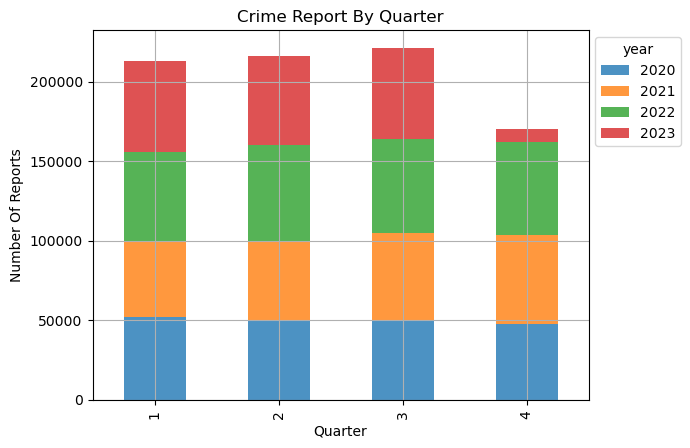

In [22]:
ax = to_plot.unstack().plot(kind='bar', stacked=True, alpha=0.8)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.title('Crime Report By Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number Of Reports')
plt.grid()

Text(0.5, 0, 'Number of Reports')

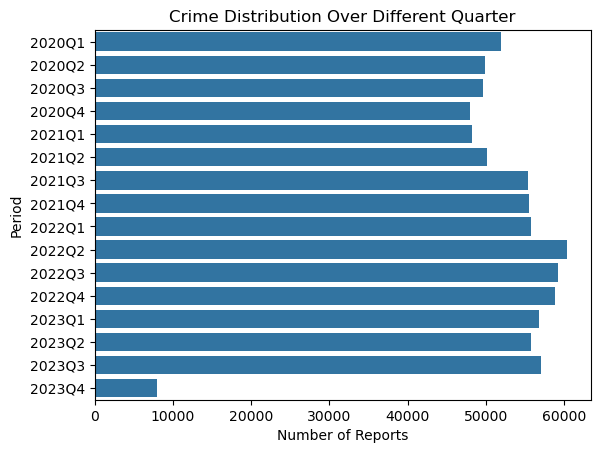

In [23]:
quarter_order = crime_over_time['Year_Q'].sort_values().unique()

sns.countplot(crime_over_time, y='Year_Q', order=quarter_order, color='#1f77b4')

plt.title("Crime Distribution Over Different Quarter")
plt.ylabel("Period")
plt.xlabel("Number of Reports")

Let's examine the typical occurrence patterns of crime throughout the day.

Text(0, 0.5, 'Number of Reports')

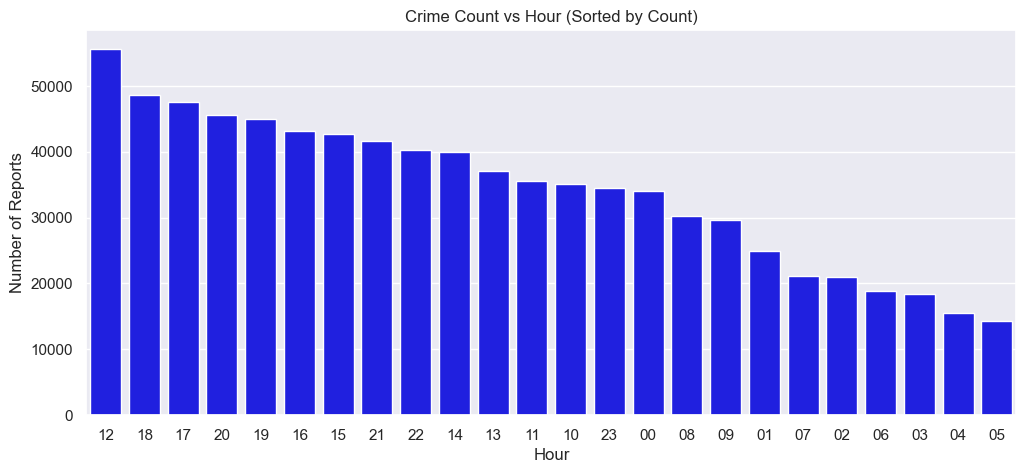

In [24]:
plt.figure(figsize=(12,5))
sns.set(style="darkgrid")

sns.countplot(data=crime_over_time, x="hour", order=crime_over_time['hour'].value_counts().index, color="blue")

plt.title('Crime Count vs Hour (Sorted by Count)')
plt.xlabel('Hour')
plt.ylabel('Number of Reports')

In contrast to the popular belief, majority of crimes appear to happen during the daytime, specifically during the noon and early hours of the evening. However, we also need to analyze the type of crime that occurs during a specified hour to take appropriate measures.

Text(0, 0.5, 'Number of Reports')

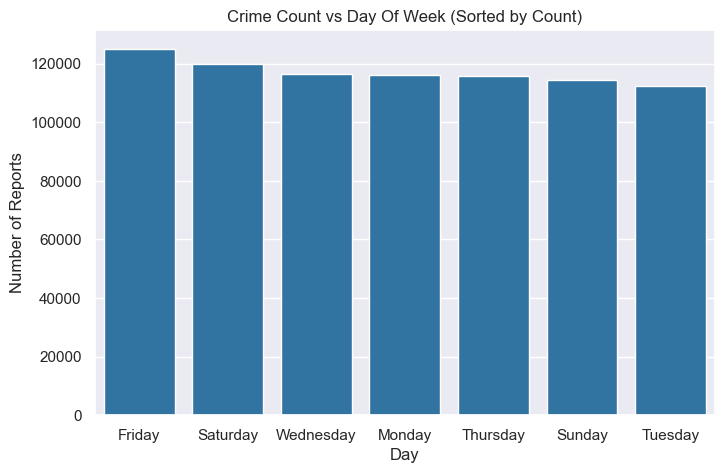

In [25]:
plt.figure(figsize=(8,5))

sns.countplot(data=crime_over_time, x="day", order=crime_over_time['day'].value_counts().index, color="#1f77b4")

plt.title('Crime Count vs Day Of Week (Sorted by Count)')
plt.xlabel('Day')
plt.ylabel('Number of Reports')

<hr>

#### Understanding Victim

In [26]:
victim = df[df['Vict Age'] > 0][['Vict Age', 'Vict Sex', 'Vict Descent']]
victim.head()

,Vict Age,Vict Sex,Vict Descent
0,36,F,B
1,25,M,H
3,76,F,W
4,31,X,X
5,25,F,H


#### Victim Age

Lets create a function to calculate ideal number of bins for a histogram. We will be using the Freedman Diaconis rule to compute the same.

In [27]:
# Calculating the number of bins using Freedman Diaconis's Method

def freedman_diaconis(data):
    data = np.asarray(data, dtype=np.float_)
    IQR  = stats.iqr(data, rng=(25, 75), scale=1, nan_policy="omit")
    N    = data.size
    bw   = (2 * IQR) / np.power(N, 1/3)

    datmin, datmax = data.min(), data.max()
    datrng = datmax - datmin
    result = int((datrng / bw) + 1)
    
    return(result)

bins_sugg = freedman_diaconis(data=victim['Vict Age'])
print('Number of bins suggested by Freedman Diaconis\'s method : ', bins_sugg)

Number of bins suggested by Freedman Diaconis's method :  229


The suggested number of bins appears to be high. Let's employ the Sturges approach to calculate a more appropriate number of bins.

In [28]:
# Calculating the number of bins using Sturges Method
bins_sugg = int(math.log2(len(victim["Vict Age"])))
print('Number of bins suggested by Sturges\'s method : ', bins_sugg)

Number of bins suggested by Sturges's method :  19


Text(0, 0.5, 'Number of Reports')

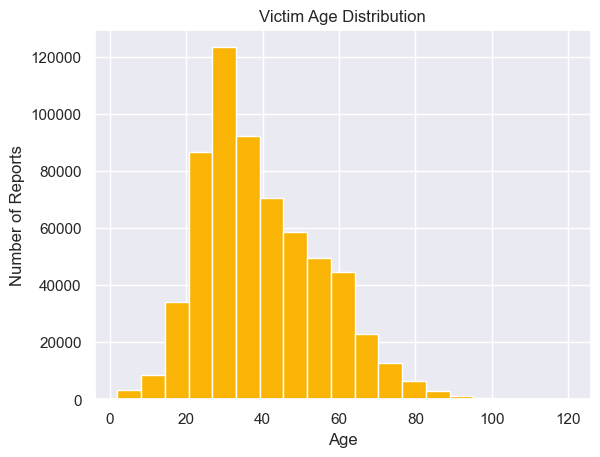

In [29]:
plt.hist(victim["Vict Age"], bins=bins_sugg, color="#f9b405")

plt.title('Victim Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Reports')

#### Victim Descent

In [30]:
victim['Vict Descent'].value_counts()

H    247561
W    155261
B    115598
O     54349
A     17659
X     12939
K      4347
F      3397
C      3138
J      1139
V       840
I       770
Z       412
P       218
U       135
D        61
G        58
L        50
S        40
-         1
Name: Vict Descent, dtype: int64

Text(0, 0.5, 'Number of Reports')

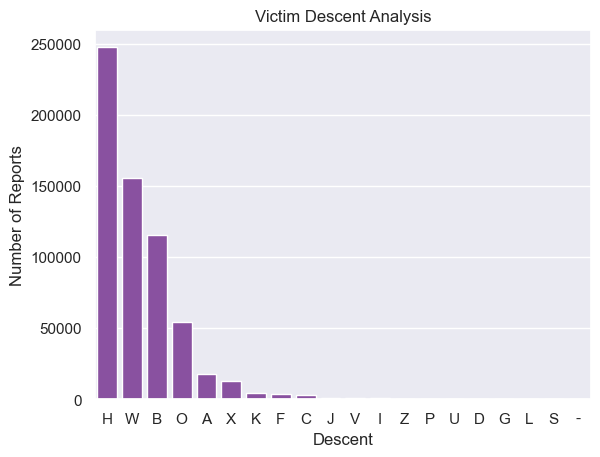

In [31]:
sns.countplot(x=victim['Vict Descent'], color='#8e44ad', order=victim['Vict Descent'].value_counts().index)

plt.title('Victim Descent Analysis')
plt.xlabel('Descent')
plt.ylabel('Number of Reports')

M    311606
F    298853
X      7425
H        88
Name: Vict Sex, dtype: int64

Text(0, 0.5, 'Number of Reports')

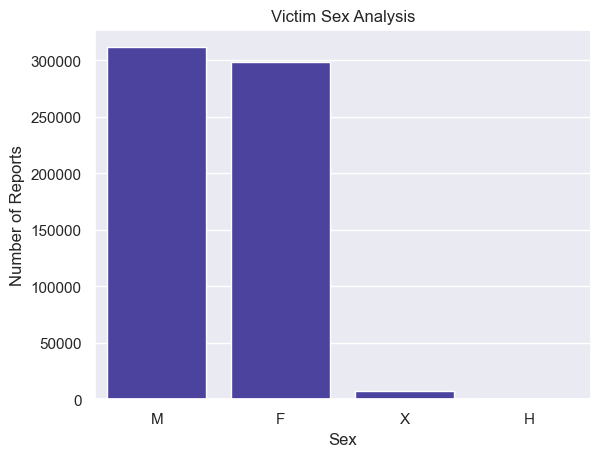

In [32]:
display(victim['Vict Sex'].value_counts())

sns.countplot(x=victim['Vict Sex'], color='#3f34ad', order=victim['Vict Sex'].value_counts().index)

plt.title('Victim Sex Analysis')
plt.xlabel('Sex')
plt.ylabel('Number of Reports')

Let's also checkout the age and sex distribution of the victims

Text(0, 0.5, 'Number of Reports')

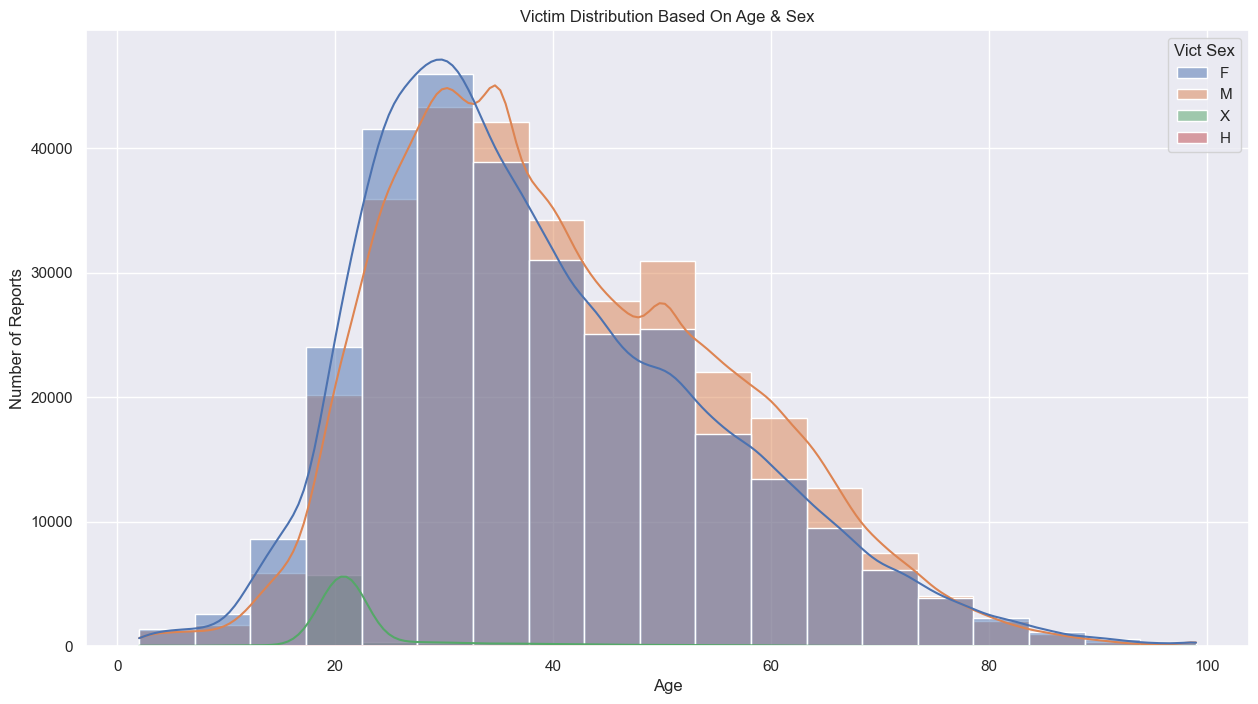

In [33]:
plt.figure(figsize=(15,8))

sns.histplot(data=victim, x="Vict Age", bins=bins_sugg, kde=True, hue='Vict Sex')

plt.title('Victim Distribution Based On Age & Sex')
plt.xlabel('Age')
plt.ylabel('Number of Reports')

We can derive the following inferences about the victims :
- Based on the graph and the descriptive statistic of the dataset calculated earlier, victims typically fall within the age range of approximately 25-35, with the highest number of victims's age averaging at 30.
- Based on the information presented in the graph and the dataset documentation, it is evident that individuals of Hispanic/Latin/Mexican descent constitute the largest group of victims, followed by Whites, and then Blacks.
- The majority of the victims are mostly male. However, the number of female victims are almost close to the number of male victims.
- The conclusive graph reveals that the majority of victims below the age of 32 are female. Similarly, majority of the victims above the age of 32 are male.

<hr>

#### Location Of Crime

Let's investigate if there are any notable differences in crime rates between regions or cities.

Text(0, 0.5, 'Area')

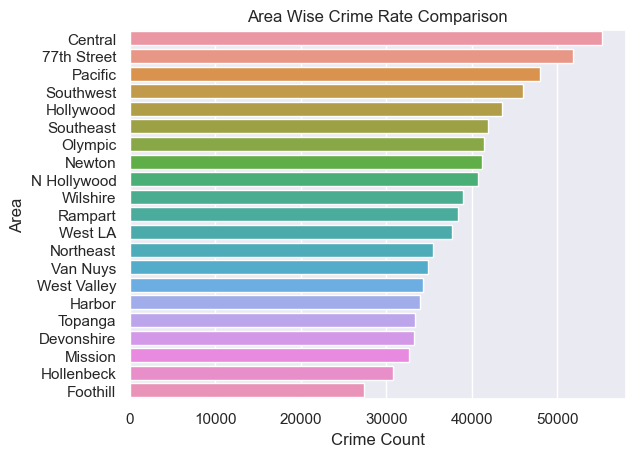

In [34]:
crime_by_area = df.groupby('AREA NAME')['AREA NAME'].count()
crime_area = df['AREA NAME'].value_counts()

sns.barplot(x=crime_by_area, y=crime_by_area.index, order=crime_by_area.sort_values(ascending=False).index)
plt.title('Area Wise Crime Rate Comparison')
plt.xlabel('Crime Count')
plt.ylabel('Area')

The graph clearly indicates that the Central area experiences the highest crime rate in the Los Angeles region, followed by the 77th Street and Pacific areas.

<hr>

#### Crime Type

Now, let's explore the type of crimes that occur thorughout Los Angeles.

In [35]:
crime_type = df[['Crm Cd', 'Crm Cd Desc']]
crime_type = crime_type.groupby(['Crm Cd', 'Crm Cd Desc']).size().sort_values(ascending=False)
top_10_crime = crime_type.head(10)
top_10_crime

Crm Cd  Crm Cd Desc                                            
510     VEHICLE - STOLEN                                           87888
624     BATTERY - SIMPLE ASSAULT                                   65360
354     THEFT OF IDENTITY                                          51944
330     BURGLARY FROM VEHICLE                                      50275
740     VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    50019
310     BURGLARY                                                   49955
230     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             47235
440     THEFT PLAIN - PETTY ($950 & UNDER)                         41704
626     INTIMATE PARTNER - SIMPLE ASSAULT                          41355
420     THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)            31696
dtype: int64

Let's see the trend of the most common type of crime over time

Text(0, 0.5, 'Number Of Reports')

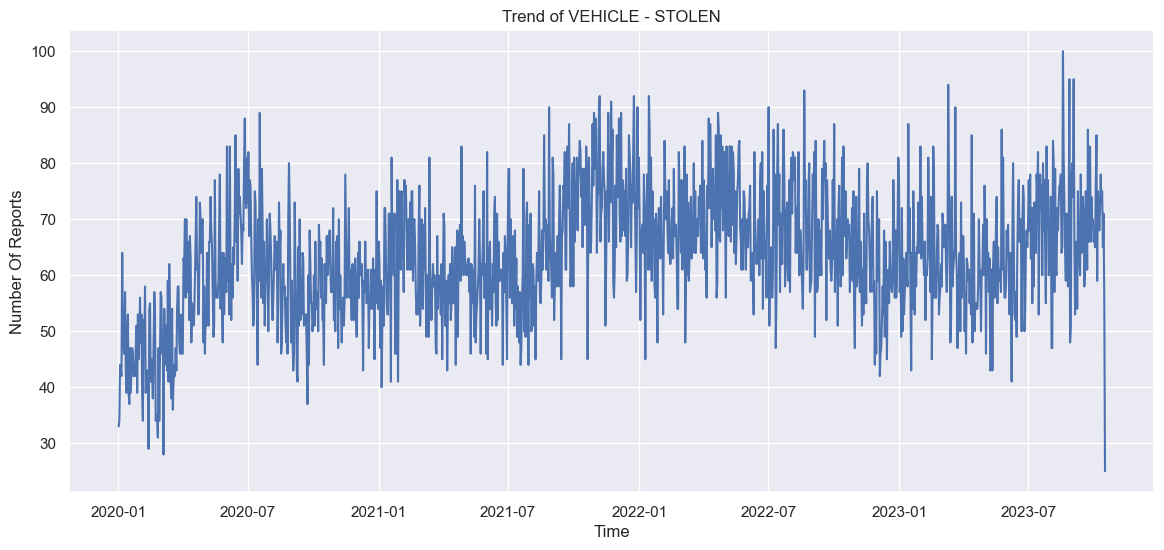

In [36]:
# Visualizing the trend of the crime : VEHICLE - STOLEN

common_crime = df[df["Crm Cd"] == top_10_crime.index[0][0]]
common_crime_per_day = common_crime["DATE OCC"].value_counts()
common_crime_per_day.sort_index(inplace=True)

plt.figure(figsize=(14,6))
plt.plot(common_crime_per_day)
plt.title("Trend of " + top_10_crime.index[0][1])
plt.xlabel('Time')
plt.ylabel('Number Of Reports')

<hr>

#### Miscellaneous

Here, let's analyze data based on multiple factors.

#### Crime Type vs Race

Text(0, 0.5, 'Crime Description')

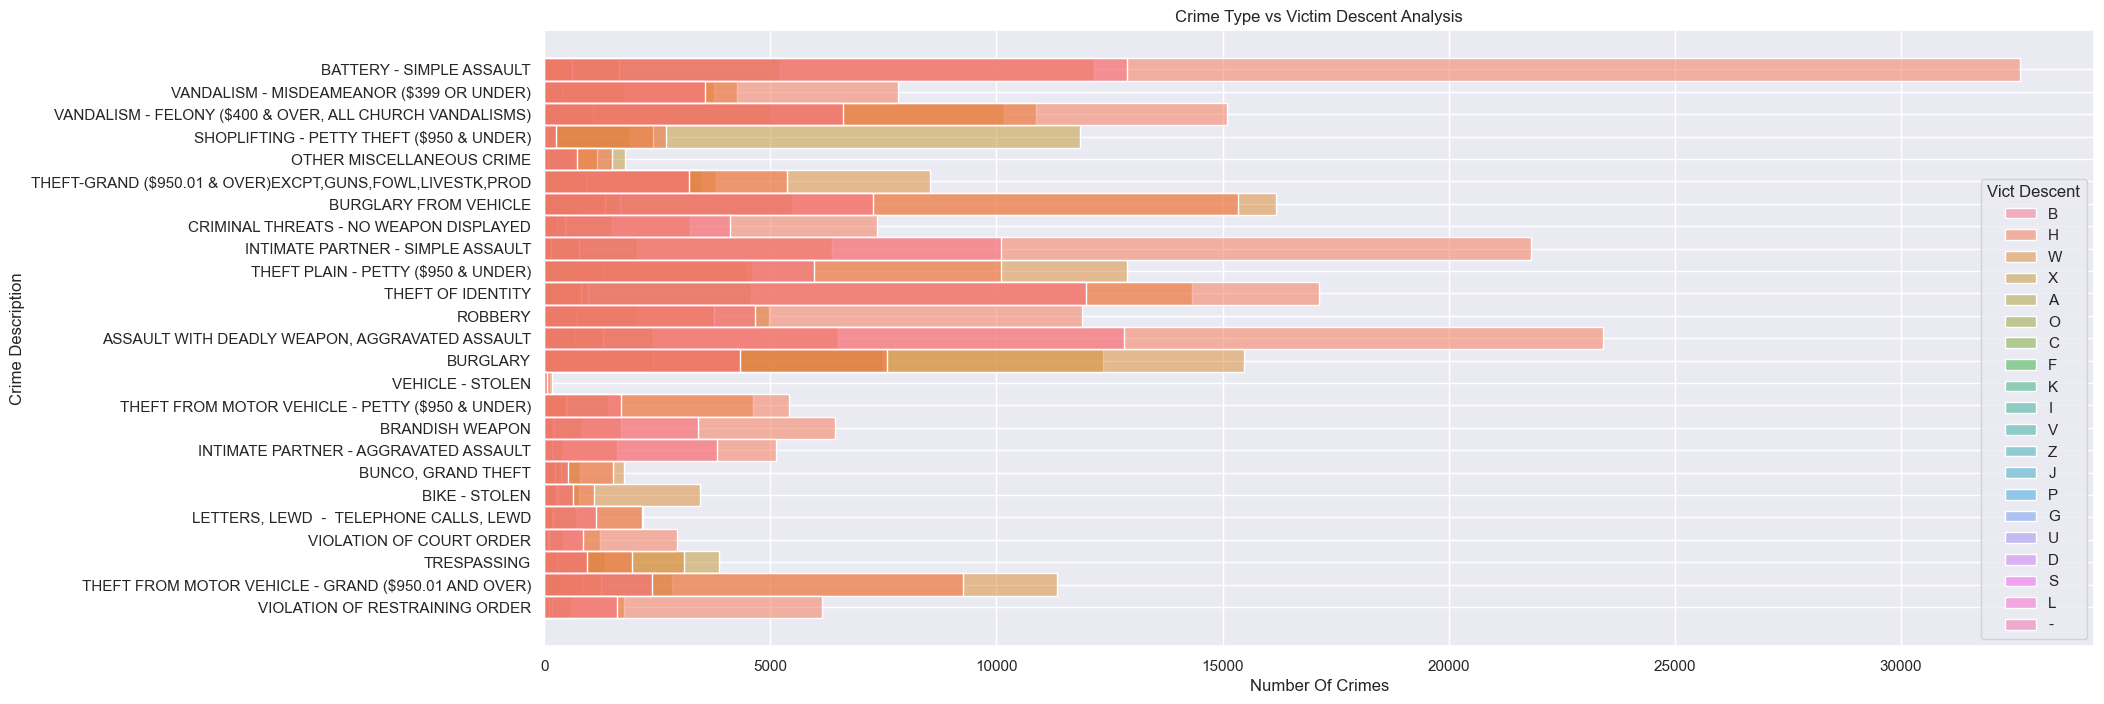

In [37]:
crime_with_5K_cases = crime_type[crime_type.values > 5000]
crime_desc_list = [i[1] for i in crime_with_5K_cases.index]

crimeTyp_race = df[df['Crm Cd Desc'].isin(crime_desc_list)].loc[:, ['Crm Cd', 'Crm Cd Desc', 'Vict Descent']]

plt.figure(figsize = (20,8))
sns.histplot(data=crimeTyp_race, y='Crm Cd Desc', hue='Vict Descent')

plt.title("Crime Type vs Victim Descent Analysis")
plt.xlabel('Number Of Crimes')
plt.ylabel('Crime Description')

Earlier, we had seen that "VEHICLE-STOLEN" had the highest number of crimes. However, in the above graph it's count appears to be far less than the calculated number of registered cases. Similarly, we had shortlisted crimes that had 5000+ cases registered. However, there are some entries where the total number of crimes are less than 5000. Let's analyze why it is so.

In [38]:
crimeTyp_race[crimeTyp_race['Crm Cd'] == 510].head()

,Crm Cd,Crm Cd Desc,Vict Descent
33,510,VEHICLE - STOLEN,NaN
78,510,VEHICLE - STOLEN,NaN
104,510,VEHICLE - STOLEN,NaN
105,510,VEHICLE - STOLEN,NaN
135,510,VEHICLE - STOLEN,NaN


In [39]:
temp = crimeTyp_race[(crimeTyp_race['Crm Cd'] == 510) & (crimeTyp_race['Vict Descent'].notna())]
temp

,Crm Cd,Crm Cd Desc,Vict Descent
4457,510,VEHICLE - STOLEN,W
4874,510,VEHICLE - STOLEN,H
6148,510,VEHICLE - STOLEN,X
12432,510,VEHICLE - STOLEN,H
13389,510,VEHICLE - STOLEN,O
...,...,...,...
806095,510,VEHICLE - STOLEN,X
813077,510,VEHICLE - STOLEN,H
815085,510,VEHICLE - STOLEN,H
815497,510,VEHICLE - STOLEN,H


In [40]:
temp = crimeTyp_race[crimeTyp_race['Vict Descent'].isna()]
temp.groupby(['Crm Cd', 'Crm Cd Desc']).size()

Crm Cd  Crm Cd Desc                                             
210     ROBBERY                                                        31
230     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT                 26
310     BURGLARY                                                       74
330     BURGLARY FROM VEHICLE                                          25
331     THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)            12
341     THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD      282
354     THEFT OF IDENTITY                                              28
420     THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)             17112
440     THEFT PLAIN - PETTY ($950 & UNDER)                             30
442     SHOPLIFTING - PETTY THEFT ($950 & UNDER)                       11
480     BIKE - STOLEN                                                   1
510     VEHICLE - STOLEN                                            87428
624     BATTERY - SIMPLE ASSAULT               

- As evident from the two derived tables above, in the majority of "VEHICLE-STOLE" cases, the victim's descent has not been identified. This absence of data has influenced the outcome depicted in the above graph.
- Likewise, there are a few additional entries where the victim's descent has not been identified on a significant scale. However, it appears that this has not considerably affected our overall result.
- It is crucial to highlight that the total number of crimes for each type has been disaggregated based on the criterion of Victim Descent.

#### Influence Of External Factors

First, let's examine the potential influence of economic factors. In this analysis, only GDP is taken into account; however, it's worth noting that additional factors such as inflation rate, unemployment rate etc. could also be considered.

In [41]:
# Importing GDP data for analysis

gdp = pd.read_csv('la_gdp.csv', names=['Year', 'GDP'])
gdp.head()


,Year,GDP
0,2020-03,-5.3
1,2020-06,-28.0
2,2020-09,34.8
3,2020-12,4.2
4,2021-03,5.2


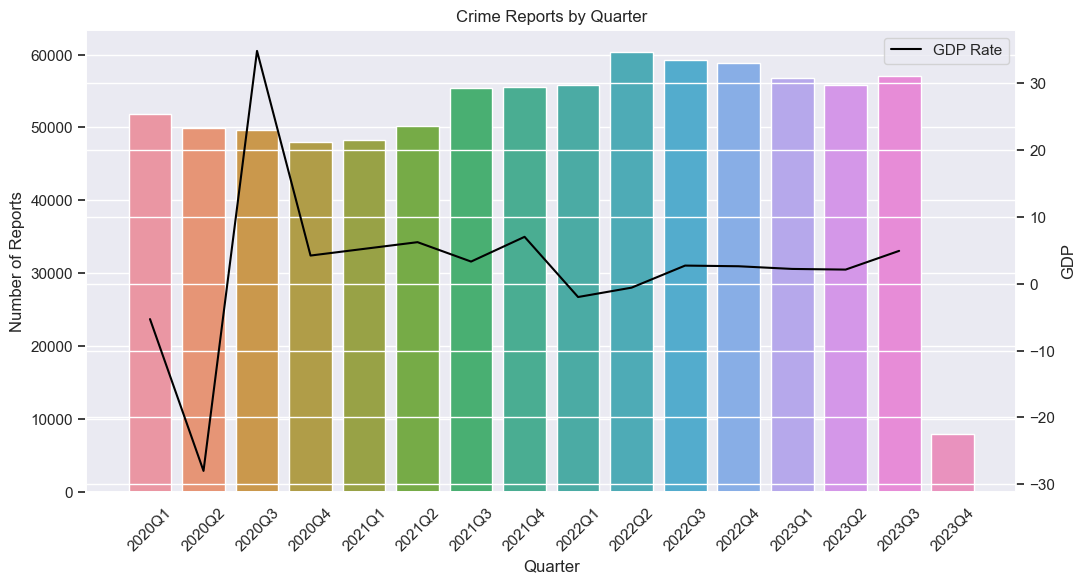

In [42]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Creating a countplot for crime reports reported per quarter on the left axis (ax1)
sns.countplot(data=crime_over_time, x='Year_Q', order=quarter_order, ax=ax1)
ax1.set_xlabel("Quarter")
ax1.set_ylabel("Number of Reports")
ax1.set_title("Crime Reports by Quarter")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Creating a lineplot to visualize change in GDP on the right axis (ax2)
ax2 = ax1.twinx()
sns.lineplot(data=gdp, x='Year', y='GDP', ax=ax2, color='black', label='GDP Rate')
ax2.set_ylabel("GDP")

plt.legend()
plt.show()

- As observed in the above graph, there seems to be an inverse proportionality between GDP and the number of crimes committed.
- However, the observed relationship does not seem to be very strong, suggesting that additional factors such as inflation, unemployment rates, etc., may also play a role in influencing the number of crimes committed.

Now, let's further investigate whether any significant incidents, events, or policy changes had an impact on the crime rate.

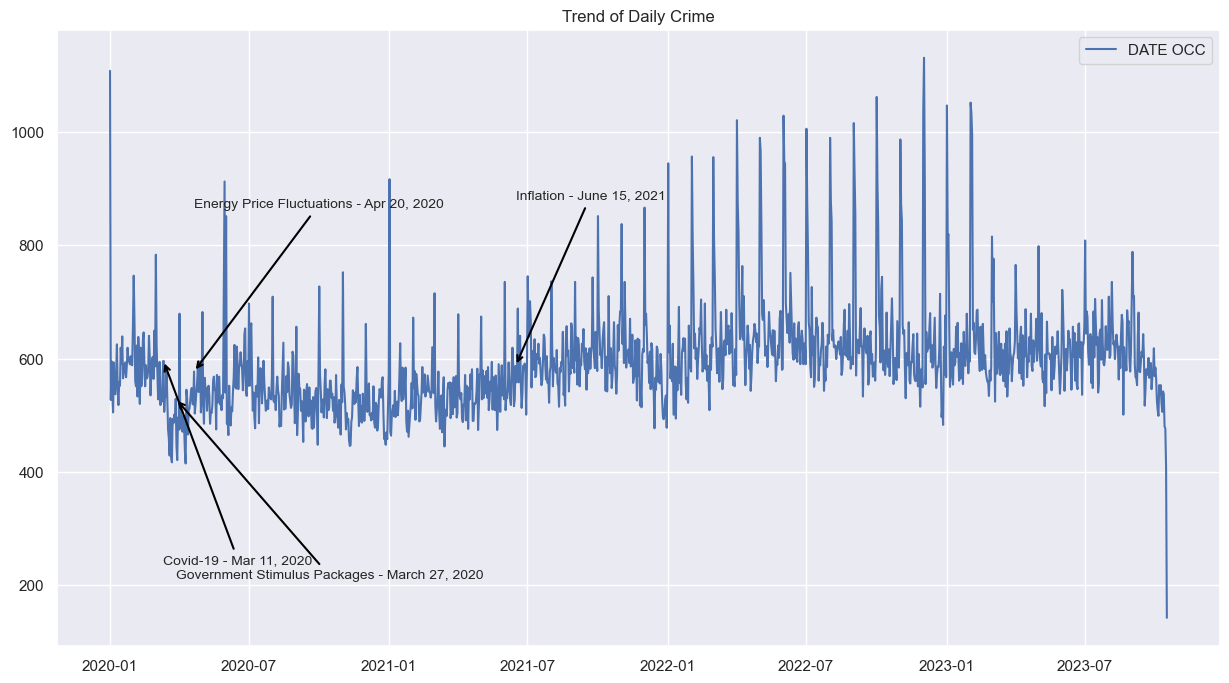

In [43]:
plt.figure(figsize=(15, 8))
sns.lineplot(count_crime_occ)
plt.title("Trend of Daily Crime")

# Adding annotations for specific events
events = [
    ("Covid-19 - Mar 11, 2020", "2020-03-11 12:00:00"),
    ("Energy Price Fluctuations - Apr 20, 2020", "2020-04-20 12:00:00"),
    ("Government Stimulus Packages - March 27, 2020", "2020-03-27 12:00:00"),
    ("Inflation - June 15, 2021", "2021-06-15 12:00:00")
]

# We will be using this flag to alternate annotation position between top and bottom
annot_flag = 0

for event, date in events:
    date = pd.to_datetime(date, format='%Y-%m-%d')

    if annot_flag == 0:
        y_pos = count_crime_occ['DATE OCC'].loc[date]*0.4
        annot_flag = 1
    else:
        y_pos = count_crime_occ['DATE OCC'].loc[date]*1.5
        annot_flag = 0
        
    plt.annotate(event, xy=(date, count_crime_occ['DATE OCC'].loc[date]), xytext=(date, y_pos), 
                 arrowprops=dict(arrowstyle='->', lw=1.5, color='black'), fontsize=10)

plt.show()

We can make the following inferences from the above graph:
- Whenever a major event occurs, there is a noticeable fluctuation in crime rates in the local range for a couple of days.
- However, it takes a couple of weeks or months to see a detect a trend.
- For example, we can see that although the inflation was declared in June 15, 2021, a major increase in crime rates only occurred in the subsequent months.

#### Crime Code vs Victim Age

/Users/rishabh_hm/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/95/w1g1703d3d9b864tbbl9hnp80000gn/T/ipykernel_3463/778814017.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crimeTyp_age['label'] = kmeans.fit_predict(crimeTyp_age)


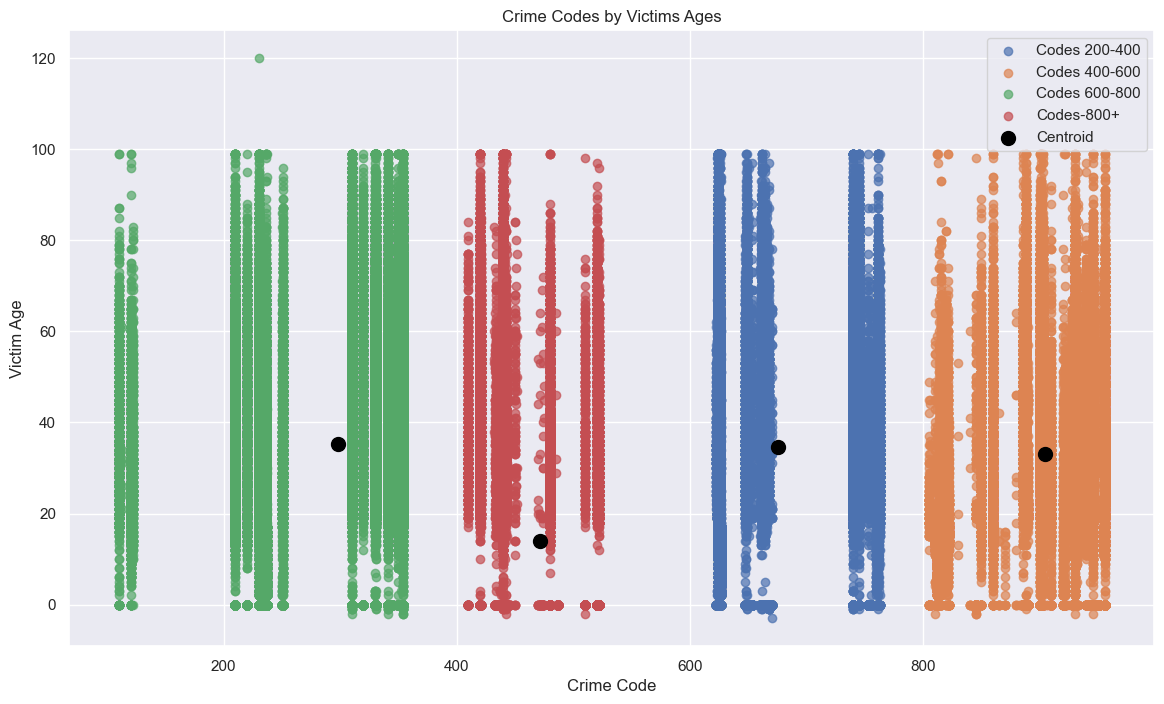

In [44]:
crimeTyp_age = df[['Crm Cd', 'Vict Age']]

# Making clusters using KMEANS algorithm
kmeans = KMeans(n_clusters=4, random_state=0)
crimeTyp_age['label'] = kmeans.fit_predict(crimeTyp_age)
plt.figure(figsize=(14, 8))
 
custom = ['Codes 200-400', 'Codes 400-600', 'Codes 600-800', 'Codes-800+']
 
for cluster, customl in zip(crimeTyp_age['label'].unique(), custom):
    cluster_data = crimeTyp_age[crimeTyp_age['label'] == cluster]
    plt.scatter(cluster_data['Crm Cd'], cluster_data['Vict Age'], label=customl, alpha=0.7)
 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='o', s=100, label='Centroid')
plt.xlabel('Crime Code')
plt.ylabel('Victim Age')
plt.title('Crime Codes by Victims Ages')
plt.legend()
 
plt.show()

- In this cluster graph, we examined various crime codes and analyzed the corresponding age group to which these specific crimes tend to occur.
- Although each code corresponds to a specific offense, for the purpose of analysis, we've categorized them into four sections.
- Codes in the range of 200-400 represent crimes such as kidnapping, robbery, carjacking, assault, and similar offenses.
- Codes falling between 400-600 correspond to crimes such as disturbing the peace, arson, burglary, forgery, theft, and larceny.
- Codes within the range of 600-800 pertain to crimes like trespassing, prostitution, or drunkenness.
- Finally, codes 800 and above are associated with crimes related to the possession of firearms, weapons, or intent to sell.
- Although criminals may face multiple charges, it's important to note that this dataset reflects the initial crime code reported at the time of the first report. The significance in this comparison lies in the mean or centroid of the data.
- An insightful observation drawn from this graph is the outlying mean or centroid of codes 400-600. In comparison to all other codes, it suggests that victims of most reported crimes are typically between the ages of 20-40. Conversely, for crimes falling under the category of 400-600, it is evident that victims of these crimes are usually below the age of 20.